<a href="https://colab.research.google.com/github/nabilpathan/nabil_analytics/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# *****Understanding the Problem*****

# **PART - 1 : APP ENGAGEMENT**
---


**What Is App Engagement?**

---

**App engagement is defined by a set of metrics that measure user interaction with an app. Common engagement metrics can include how many times a user opens the app, the duration of a usage session, and what actions a user takes within an app.**

---
Now we have the basic idea that app engagement is nothing but measure of usage of application

---
Now the question arises how to measure it, that can be answered by evaluating the factors responsible for it.

---



*1.Number of downloads*

*2.Total number of users (new and old)*

*3.Active app users*

*4.Session interval*

*5.Session lengt*

*6.Time in the app*

*7.Screen flow*

*8.Retention*

*9.Conversation*



# As we have access to only two of the factors responsible for app engagement in the provided data i.e.


---


**Number of downloads.**

**To achieve app engagement, the very first step is reaching a substantially large number of downloads. This is considered the most important metric for measuring the user engagement since the vital objective is to consolidate a broad user base.**

---


**Conversation**

**If there are any actionable features in your app like signing up, making a transaction, filling a form, giving a review, etc you’ll want to measure how many users are getting converted to goal target.**

---



**After observing the User review data:**


---


**Conversation** a.k.a. **User review data Sentiments** can further be classified in two subcatogories : Polarity and Subjectivity



---




In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

data='/content/drive/MyDrive/Copy of Play Store Data.csv'
review='/content/drive/MyDrive/Copy of User Reviews.csv'

Mounted at /content/drive


In [ ]:
#Show time
df_data= pd.read_csv(data)
df_review=pd.read_csv(review)

In [ ]:
lowest_value_of_Positive_polarity=df_review[df_review['Sentiment']=='Positive']['Sentiment_Polarity'].sort_values()
lowest_value_of_Positive_polarity.head()

11231    5.551115e-18
16195    6.938894e-18
6941     9.251859e-18
5812     1.387779e-17
44664    1.387779e-17
Name: Sentiment_Polarity, dtype: float64

FROM ABOVE

**Polarity** is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.

**Also positive>0>negative**

In [ ]:
lowest_value_of_Positive_subjectivity=df_review[df_review['Sentiment']=='Positive']['Sentiment_Subjectivity'].sort_values()
lowest_value_of_Positive_subjectivity.head()

51807    0.0
11730    0.0
35811    0.0
213      0.0
28902    0.0
Name: Sentiment_Subjectivity, dtype: float64

FROM ABOVE

**Subjective** sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

for eg if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.


# **Theoritically, From the above information it can be concluded that app engagement depends on two factors**


---


#    **1. Installs**

#    **2. Sentiments**




---






---



---









# **PART - II (SUCCESS OF APP)**



# **DATA CLEANING**

In [ ]:
df_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df_data[df_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Catogory 1.9 have only and 1 row and and 1.9 doesnt really reflect any meaning, so replacing it with NaN**

In [ ]:
df_data['Category'].replace('1.9',np.nan, inplace = True)

In [ ]:
df_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Converting all data into kilobyte**

In [ ]:
df_data['Size'] = df_data.Size.replace("Varies with device",np.nan)

In [ ]:
for i in df_data['Size']:
  if type(i) != float:
   if 'M' in i:
     ind=i.index
     i = i[:-1]
     i = float(i)*1024
     print(df_data[df_data['Size']==i].index.values)


In [ ]:
df_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
for i in df_data['Size']:
  if type(i) != float:
   if 'M' in i:
     i = i[:-1]
     i = float(i)*1024
     print(i)
   elif 'k' in i:
     i = i[:-1]
     i = float(i)
     print(i)


Streaming output truncated to the last 5000 lines.
57344.0
25600.0
26624.0
101376.0
25600.0
101376.0
44032.0
17408.0
81920.0
45056.0
12288.0
102400.0
70656.0
92160.0
90112.0
65536.0
39936.0
55296.0
57344.0
14336.0
76800.0
13312.0
8294.4
20480.0
58368.0
31744.0
39936.0
29696.0
3686.4
3891.2
4710.4
545.0
2150.4
61.0
13312.0
2867.2
10137.6
2560.0
5529.6
14336.0
1331.2
2560.0
283.0
2355.2
1638.4
25600.0
5529.6
1536.0
5427.2
2048.0
5529.6
41984.0
5529.6
2457.6
5529.6
9216.0
25600.0
1228.8
46080.0
5427.2
3276.8
74752.0
11264.0
5529.6
655.0
5734.4
17408.0
9728.0
7577.6
5529.6
2662.4
98304.0
74752.0
5529.6
35840.0
49152.0
37888.0
17408.0
35840.0
2355.2
16384.0
26624.0
2969.6
714.0
12288.0
53248.0
3276.8
50176.0
28672.0
12288.0
17408.0
37888.0
2048.0
83968.0
37888.0
49152.0
55296.0
47104.0
52224.0
49152.0
56320.0
25600.0
33792.0
102400.0
71680.0
9420.8
44032.0
93184.0
29696.0
45056.0
30720.0
101376.0
92160.0
73728.0
48128.0
23552.0
26624.0
5120.0
20480.0
30720.0
37888.0
28672.0
87040.0
22528.0


In [ ]:
df_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#df_data['Size'] = df_data.Size.str.replace("M","000")
#df_data['Size'] = df_data.Size.str.replace("k","")

In [ ]:
df_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

**We need to remove coma's and plus signs**

In [ ]:
df_data['Installs'] = df_data.Installs.str.replace(",","")
df_data['Installs'] = df_data.Installs.str.replace("+","")
df_data['Installs'] = df_data.Installs.replace("Free",np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df_data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

**Lets see the co-relation and the heat map, I AM CURIOUS**

In [ ]:
df_data.corr()

,Rating
Rating,1.0


**why other columns are not showing, Ah., we need to convert all datas in Float type**

In [ ]:
df_data['Rating'] = pd.to_numeric(df_data['Rating'], errors='coerce')

In [ ]:
df_data['Reviews'] = pd.to_numeric(df_data['Reviews'], errors='coerce')

In [ ]:
df_data['Size'] = pd.to_numeric(df_data['Size'], errors='coerce')

In [ ]:
df_data['Installs'] = df_data['Installs'].astype(float)

In [ ]:
# Checking for non float values
for i in df_data['Rating']:
  if type(i) != float:
    print(i,'rating')
for i in df_data['Reviews']:
  if type(i) != float:
    print(i,'reviews')
for i in df_data['Size']:
  if type(i) != float:
    print(i,'Size')
for i in df_data['Installs']:
  if type(i) != float:
    print(i,'Installs')


In [ ]:
df_data.corr()

,Rating,Reviews,Size,Installs
Rating,1.000000,0.068141,NaN,0.051355
Reviews,0.068141,1.000000,NaN,0.643122
Size,NaN,NaN,NaN,NaN
Installs,0.051355,0.643122,NaN,1.000000


Seems to work now, but we also have other columns like
**(Price	Content Rating	Genres	Last Updated	Current Ver	Android Version)**

but i think, only **Price columns possess numerical values that have the potential to show co-relation**

In [ ]:
df_data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
df_data['Price'] = df_data.Price.replace("Everyone",np.nan)
df_data['Price'] = df_data.Price.str.replace("$","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,NaN,0.051355,-0.021903
Reviews,0.068141,1.000000,NaN,0.643122,-0.009667
Size,NaN,NaN,NaN,NaN,NaN
Installs,0.051355,0.643122,NaN,1.000000,-0.011689
Price,-0.021903,-0.009667,NaN,-0.011689,1.000000


Now we have a complete co-relation matrix


NameError: ignored

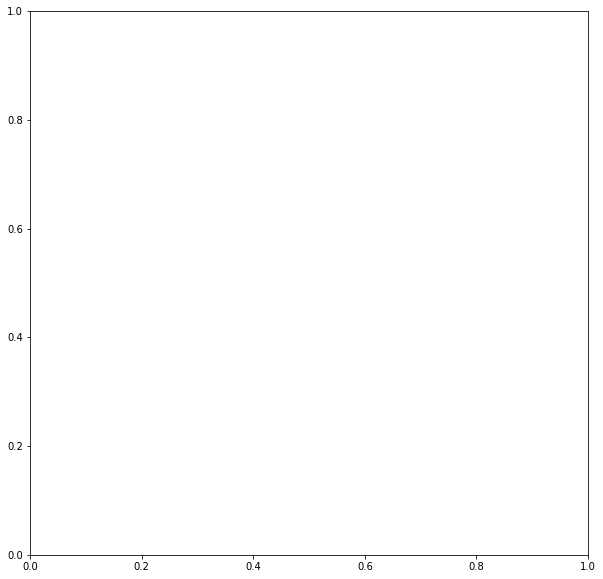

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_data.corr(), annot=True)
plt.show()

In [ ]:
# After carrying out an over all co-relation of the data

**CATAGORY WISE - ANALYSIS**

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

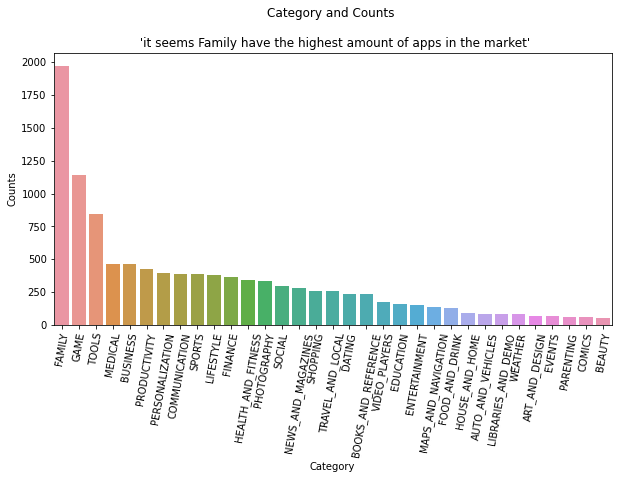

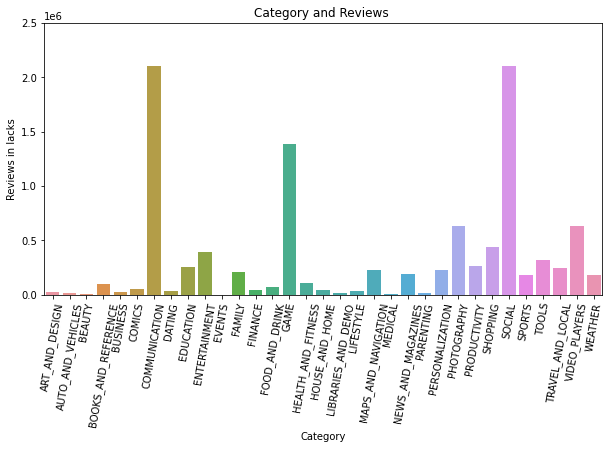

In [ ]:

# CAT and Counts
cat_count=df_data['Category'].value_counts().rename_axis('Categories').reset_index(name='counts')
plt.figure(figsize=(10,5))
sns.barplot(x=cat_count['Categories'], y=cat_count['counts'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Category and Counts \n \n 'it seems Family have the highest amount of apps in the market'")
plt.show()

# CAT and Reviews

cat_review=df_data.groupby('Category')['Reviews'].mean().reset_index()
cat_review['Reviews']=cat_review['Reviews'].round(decimals=2)
plt.figure(figsize=(10,5))
sns.barplot(x=cat_review['Category'], y=cat_review['Reviews'])
plt.ylim(0, 2500000)
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews in lacks")
plt.title("Category and Reviews ")
plt.show()




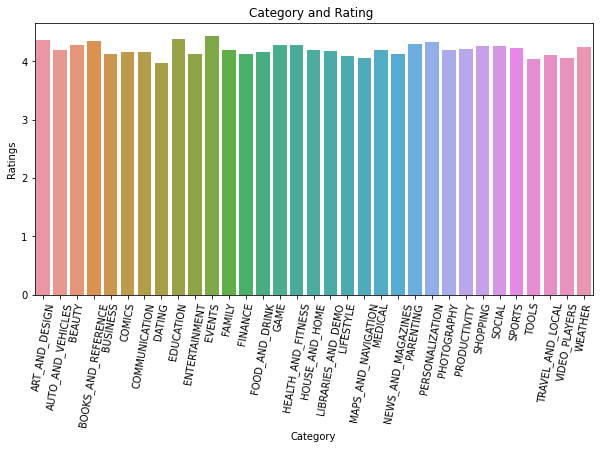

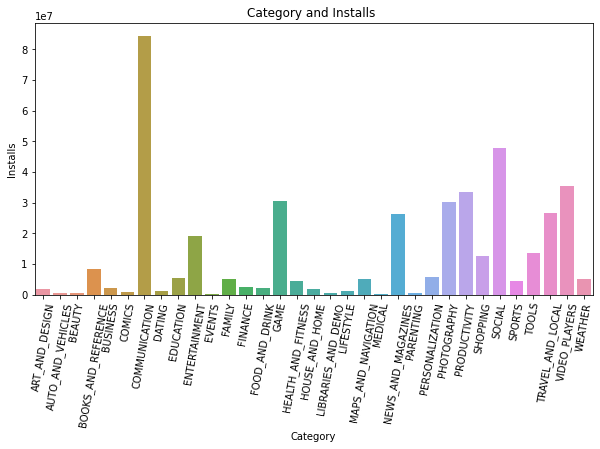

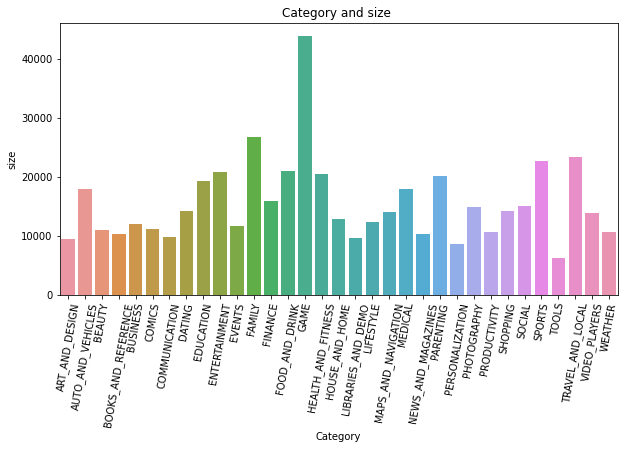

In [ ]:
# CAT and rating

plt.figure(figsize=(10,5))
cat_rate=df_data.groupby('Category')['Rating'].mean().reset_index()


sns.barplot(x=cat_rate['Category'], y=cat_rate['Rating'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.title("Category and Rating ")
plt.show()

# CAT and Installs

plt.figure(figsize=(10,5))
cat_inst=df_data.groupby('Category')['Installs'].mean().reset_index()
cat_inst['Installs']=cat_inst['Installs'].round(decimals=2)
sns.barplot(x=cat_inst['Category'], y=cat_inst['Installs'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category and Installs ")
plt.show()

# CAT and size

cat_size=df_data.groupby('Category')['Size'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=cat_size['Category'], y=cat_size['Size'])

plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("size")
plt.title("Category and size ")
plt.show()

# Findings


1.   The **maximum** number of applications are of category : **Communication** and     followed by **Games** and **Tools**
2.   The **highest** number of reviews are given to category : **Communication** followed by **Games** and **Tools**. Also these three exceeded others by a huge gap
3.   The **maximum** number of installations are of category : **Communication** followed by **Social** and **Games**   






# Now, digging deeper into the data and finding inter-dependencies.

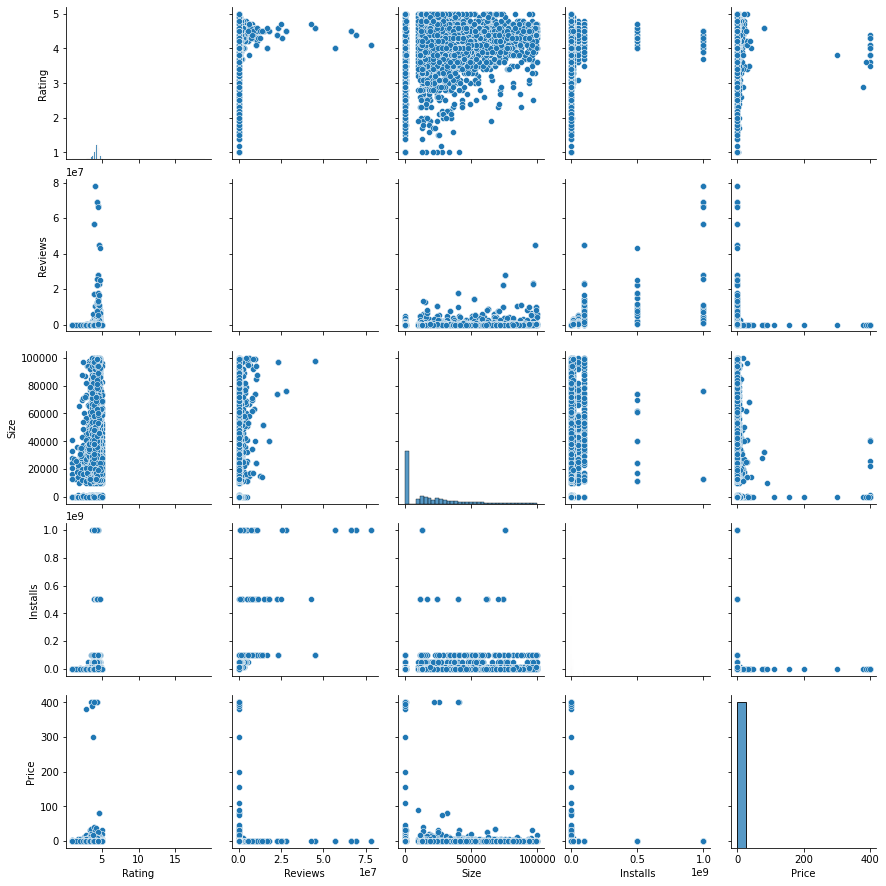

In [ ]:
sns.pairplot(df_data, kind='scatter')
plt.show()


1. From the pairplot its clearly visible that as the Rating crosses 3.8 then there is a substancial growth in the number of reviews

2. As the size of application increases, a reduction in the number of low ratings is seen

3. There is a very weak trend in the reviews and size of applications, but cant take into consideration

4. As far as the number of insatallations are concerned, there is a gapped map i.e.


In [ ]:
df_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df_review[df_review.Sentiment=='Neutral']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0
...,...,...,...,...,...
64189,Hotwire Hotel & Car Rental App,Solid app. No issues yet. Been using year.,Neutral,0.0,0.1
64194,Hotwire Hotel & Car Rental App,"Keeps telling there's problem date time, can't...",Neutral,0.0,0.0
64200,Housing-Real Estate & Property,Why business? Your filters don't work.. redire...,Neutral,0.0,0.0
64205,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.0,0.0
